## This notebook looks to read an image and bound the ID. The bounded ID is padded, thresholded and cleaned. 

In [3]:
from google.cloud import vision
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import rotate
from skimage.draw import polygon

from helpers.corrections import *
from helpers.image_loading import * 
from helpers.handling import *
from helpers.identity_isolation import * 

client = vision.ImageAnnotatorClient()

In [4]:
random_files = ListAvaliableFiles('guppy_images', prefix='Manually_Labelled/New', verbose=False)
np.random.shuffle(random_files)

F pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: F upper height: 488 lower height: 380
C pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:1
character: C upper height: 490 lower height: 381
A pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:2
character: A upper height: 492 lower height: 383
4 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:0
character: 4 upper height: 741 lower height: 531
0 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:1
character: 0 upper height: 741 lower height: 531
8 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:2
character: 8 upper height: 742 lower height: 532
0 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:3
character: 0 upper height: 742 lower height: 532
8 pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:0
character: 8 upper height: 853 lower height: 732
/ pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:1
character: / upper height: 852 lower height: 731
2 pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:2
character

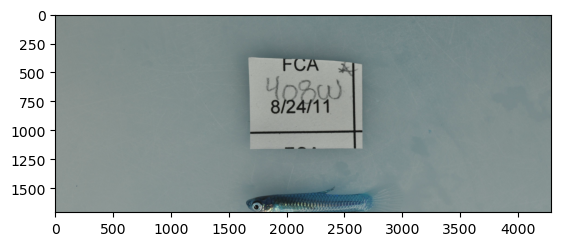

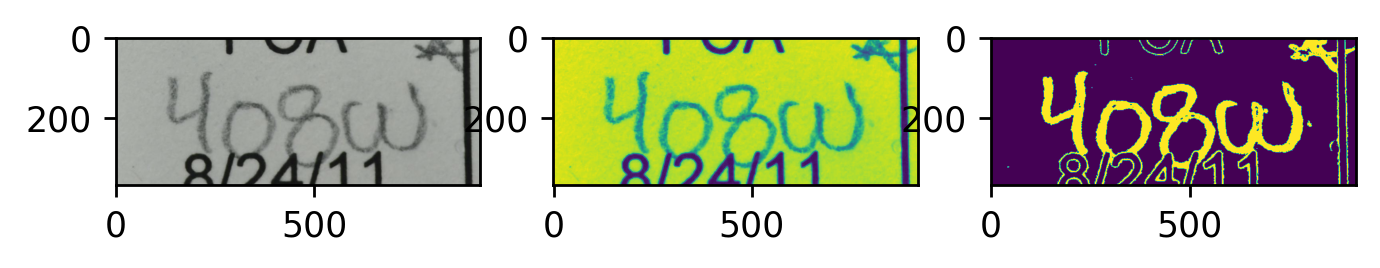

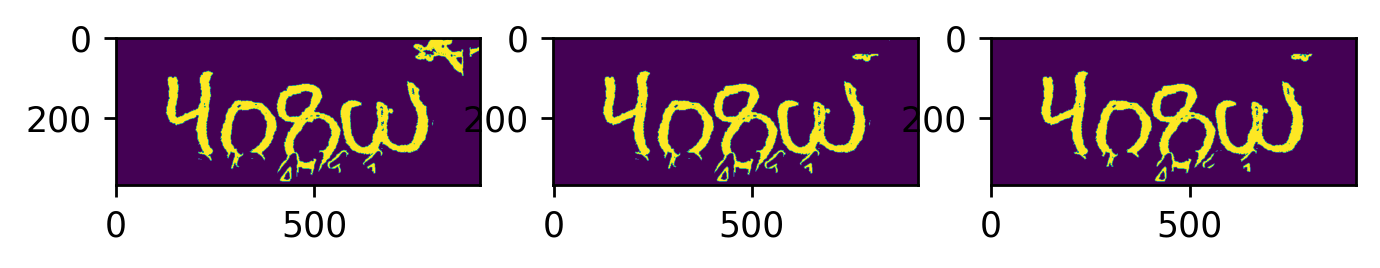

In [14]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[83])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes, added_length=100)

padx = 100
pady = 80
# Reduce the image to just the ID
reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

# Mask and remove for final image
masked_image = mask_and_remove(reduced_frame, verbose = True)

if len(character_boxes) == 3:
    final_image = remove_deltas(masked_image, width=15, padx=padx + 100, pady=pady//2, verbose = True)

else:
# Remove deltas
    final_image = remove_deltas(masked_image, width=15, padx=padx, pady=pady//2, verbose = True)

corrected_label = FindErrors(output_string, verbose=False)

shape = np.shape(final_image)
counts = np.count_nonzero(final_image)
valid_test = counts / (shape[0] * shape[1])

print("\n\n", output_string, corrected_label)
print(valid_test)

Manually_Labelled/New/LL1102/MLL2F6R1102.JPG


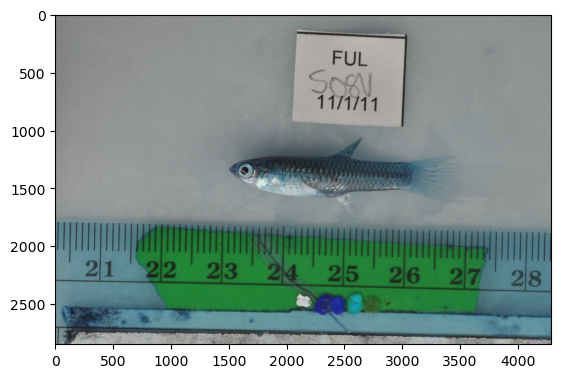

In [6]:
decoded = np.frombuffer(image_in_bytes.getvalue(), dtype=np.uint8)
frame = cv2.imdecode(decoded, cv2.IMREAD_COLOR) 
plt.imshow(frame)
print(random_files[8])

(upper thresh, lower_thresh) = (160.16, 98.00)


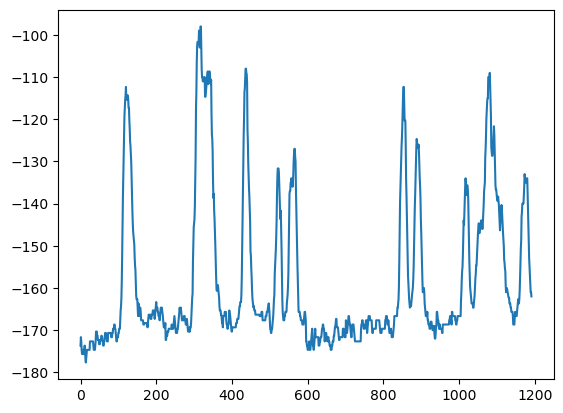

In [7]:
# Average out the RGB axis
averaged_frame = np.mean(reduced_frame,axis=2)

# White background masking
hist = np.histogram(averaged_frame, bins=100)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])

thresh_val = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
upper_thresh = centers[thresh_val] * 0.975

# Dark writing masking. Mask based on central row of frame
frame_shape = np.shape(averaged_frame)
row1 = -averaged_frame[2 * frame_shape[0] // 5][00:-200]
row2 = -averaged_frame[3 * frame_shape[0] // 5][00:-200]
rows = np.concatenate((row1, row2))
# rows = row2 = -averaged_frame[1]
row_mean = np.mean(rows)
row_max = np.max(rows)
row_min = np.min(rows)
peaks,_ = scipy.signal.find_peaks(rows, height = row_mean + ((row_max - row_min) / 5), distance=4)

values = []
for peak in peaks:
    values.append(-rows[peak])

sorted_values = np.sort(values)

lower_thresh = sorted_values[0] * 1

averaged_frame[averaged_frame>upper_thresh] = 0
averaged_frame[averaged_frame<lower_thresh] = 0
averaged_frame[averaged_frame!=0] = 255

plt.plot(rows)
# plt.imshow(averaged_frame)
print('(upper thresh, lower_thresh) = (%.2f, %.2f)' %(upper_thresh, lower_thresh))

160.15675

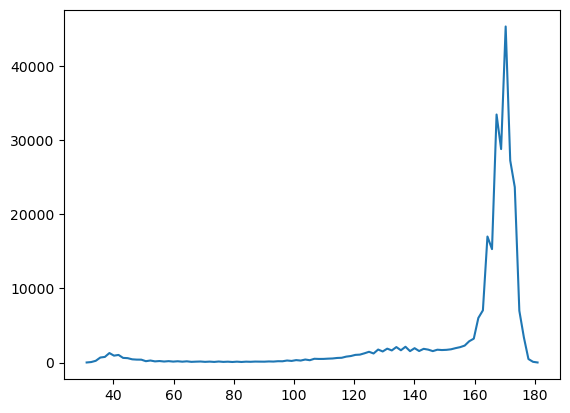

In [8]:
averaged_frame = np.mean(reduced_frame,axis=2)

# White background masking
hist = np.histogram(averaged_frame, bins=100)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])

thresh = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
upper_thresh = centers[thresh_val] * 0.975

# averaged_frame = np.mean(reduced_frame,axis=2)
# hist = np.histogram(averaged_frame, bins=1000)
# centers = 0.5*(hist[1][1:]+ hist[1][:-1])

# thresh = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
# centers[thresh] * 0.975

plt.plot(centers, hist[0])
centers[thresh] * 0.975

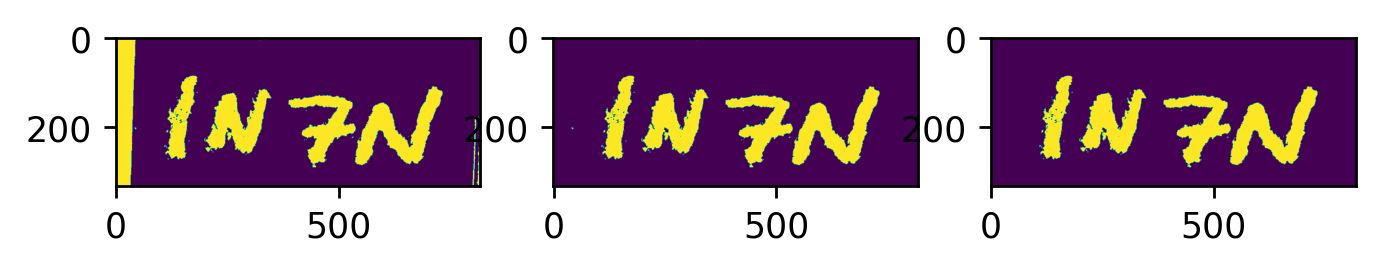

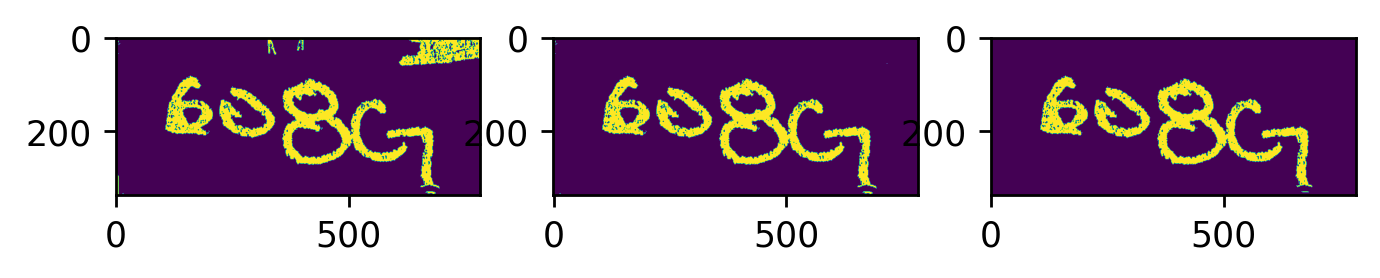

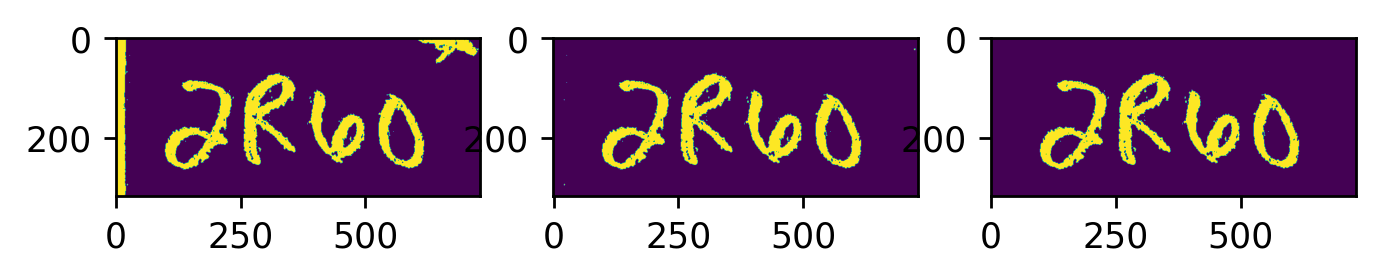

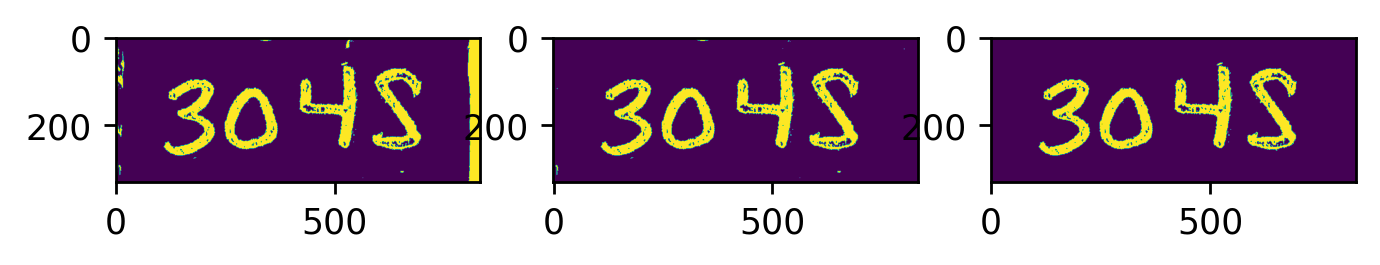

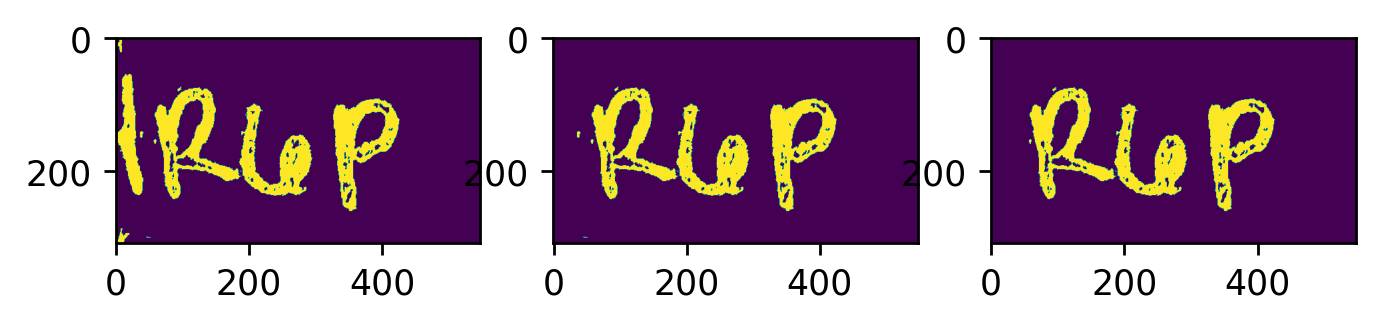

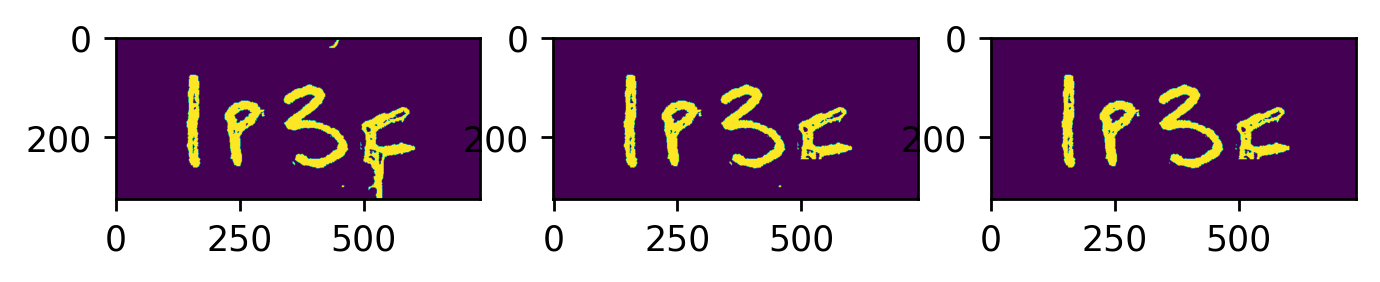

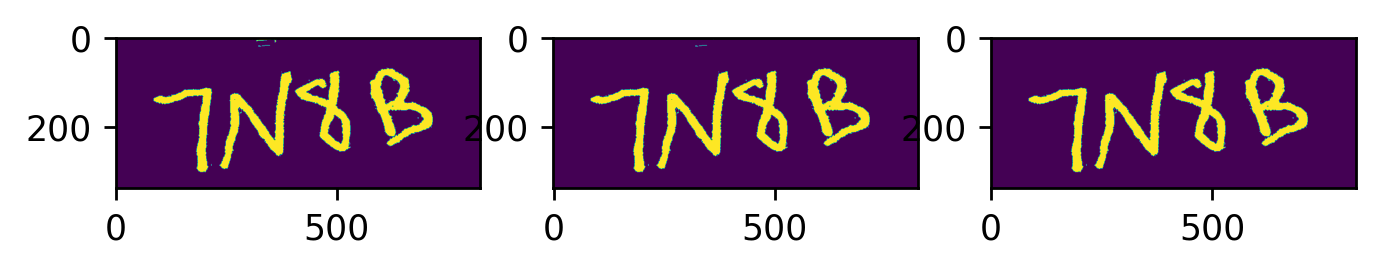

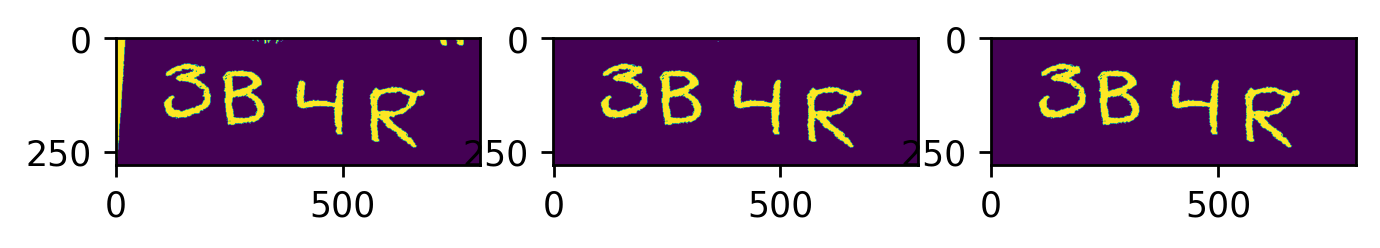

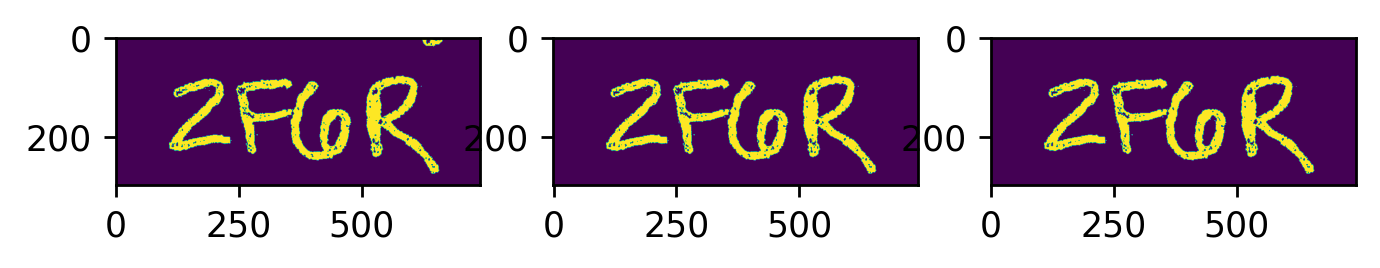

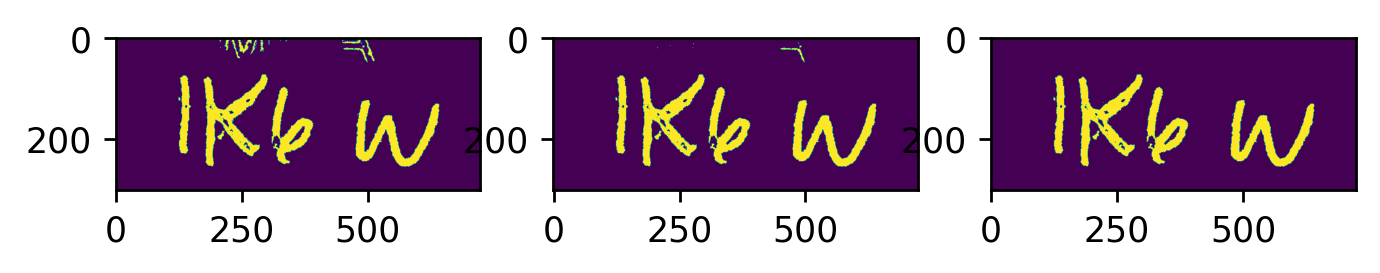

In [9]:
%matplotlib inline
padx = 100
pady = 80
for i in range(10):
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[i])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        final_image = remove_deltas(masked_image, width=15, padx=padx, pady=pady, verbose = True)
    
    except:
        pass

F pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: F upper height: 403 lower height: 219
C pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:1
character: C upper height: 421 lower height: 232
A pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:2
character: A upper height: 439 lower height: 249
X pageno:0 blockno:0 paragraphno:0 wordno:1 symbolno:0
character: X upper height: 470 lower height: 273
* pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:0
character: * upper height: 482 lower height: 261
6 pageno:0 blockno:1 paragraphno:0 wordno:0 symbolno:0
character: 6 upper height: 542 lower height: 433
W pageno:0 blockno:1 paragraphno:0 wordno:0 symbolno:1
character: W upper height: 542 lower height: 433
7 pageno:0 blockno:1 paragraphno:0 wordno:0 symbolno:2
character: 7 upper height: 542 lower height: 433
K pageno:0 blockno:1 paragraphno:0 wordno:0 symbolno:3
character: K upper height: 542 lower height: 433
1 pageno:0 blockno:1 paragraphno:1 wordno:0 symbolno:0
character

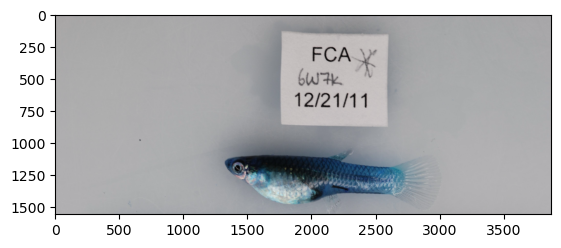

In [10]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[102])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes)

0 0.14853185636318167
1 0.12099936413734633
2 0.11722414738032254
3 0.11358585987586524
4 0.12043203147217746
5 0.08675523349436393
6 0.11396091088398781
7 0.08389949892116479
8 0.1188833010727401
9 0.09837833373102549
10 0.09803270017157079
11 0.09821546421688973
12 0.10529760597408303
13 0.06943685073810825
14 0.08966250527049076
15 0.09087913779830639
16 0.1070906432748538
17 0.07765583153914825
18 0.12779981816679065
20 0.11784342247584946
21 0.112084001462852
22 0.14647709983736426
24 0.0705280172413793
25 0.0853043852215378
26 0.11398104440455348
27 0.11098924731182795
28 0.09471286262194652
29 0.0666421207658321
30 0.10891984359726295
31 0.11301304775362139
32 0.08746833686109858
33 0.11905054937593101
34 0.14048877533108384
35 0.12373882586648544
36 0.10834487798535734
37 0.1276298430095943
38 0.11400393684971678
39 0.08792413882079732
40 0.08032491697010924
41 0.11175782529359472
42 0.0977861831126933
43 0.1141046511627907
44 0.11551288855737094
45 0.09088289845677346
46 0.123

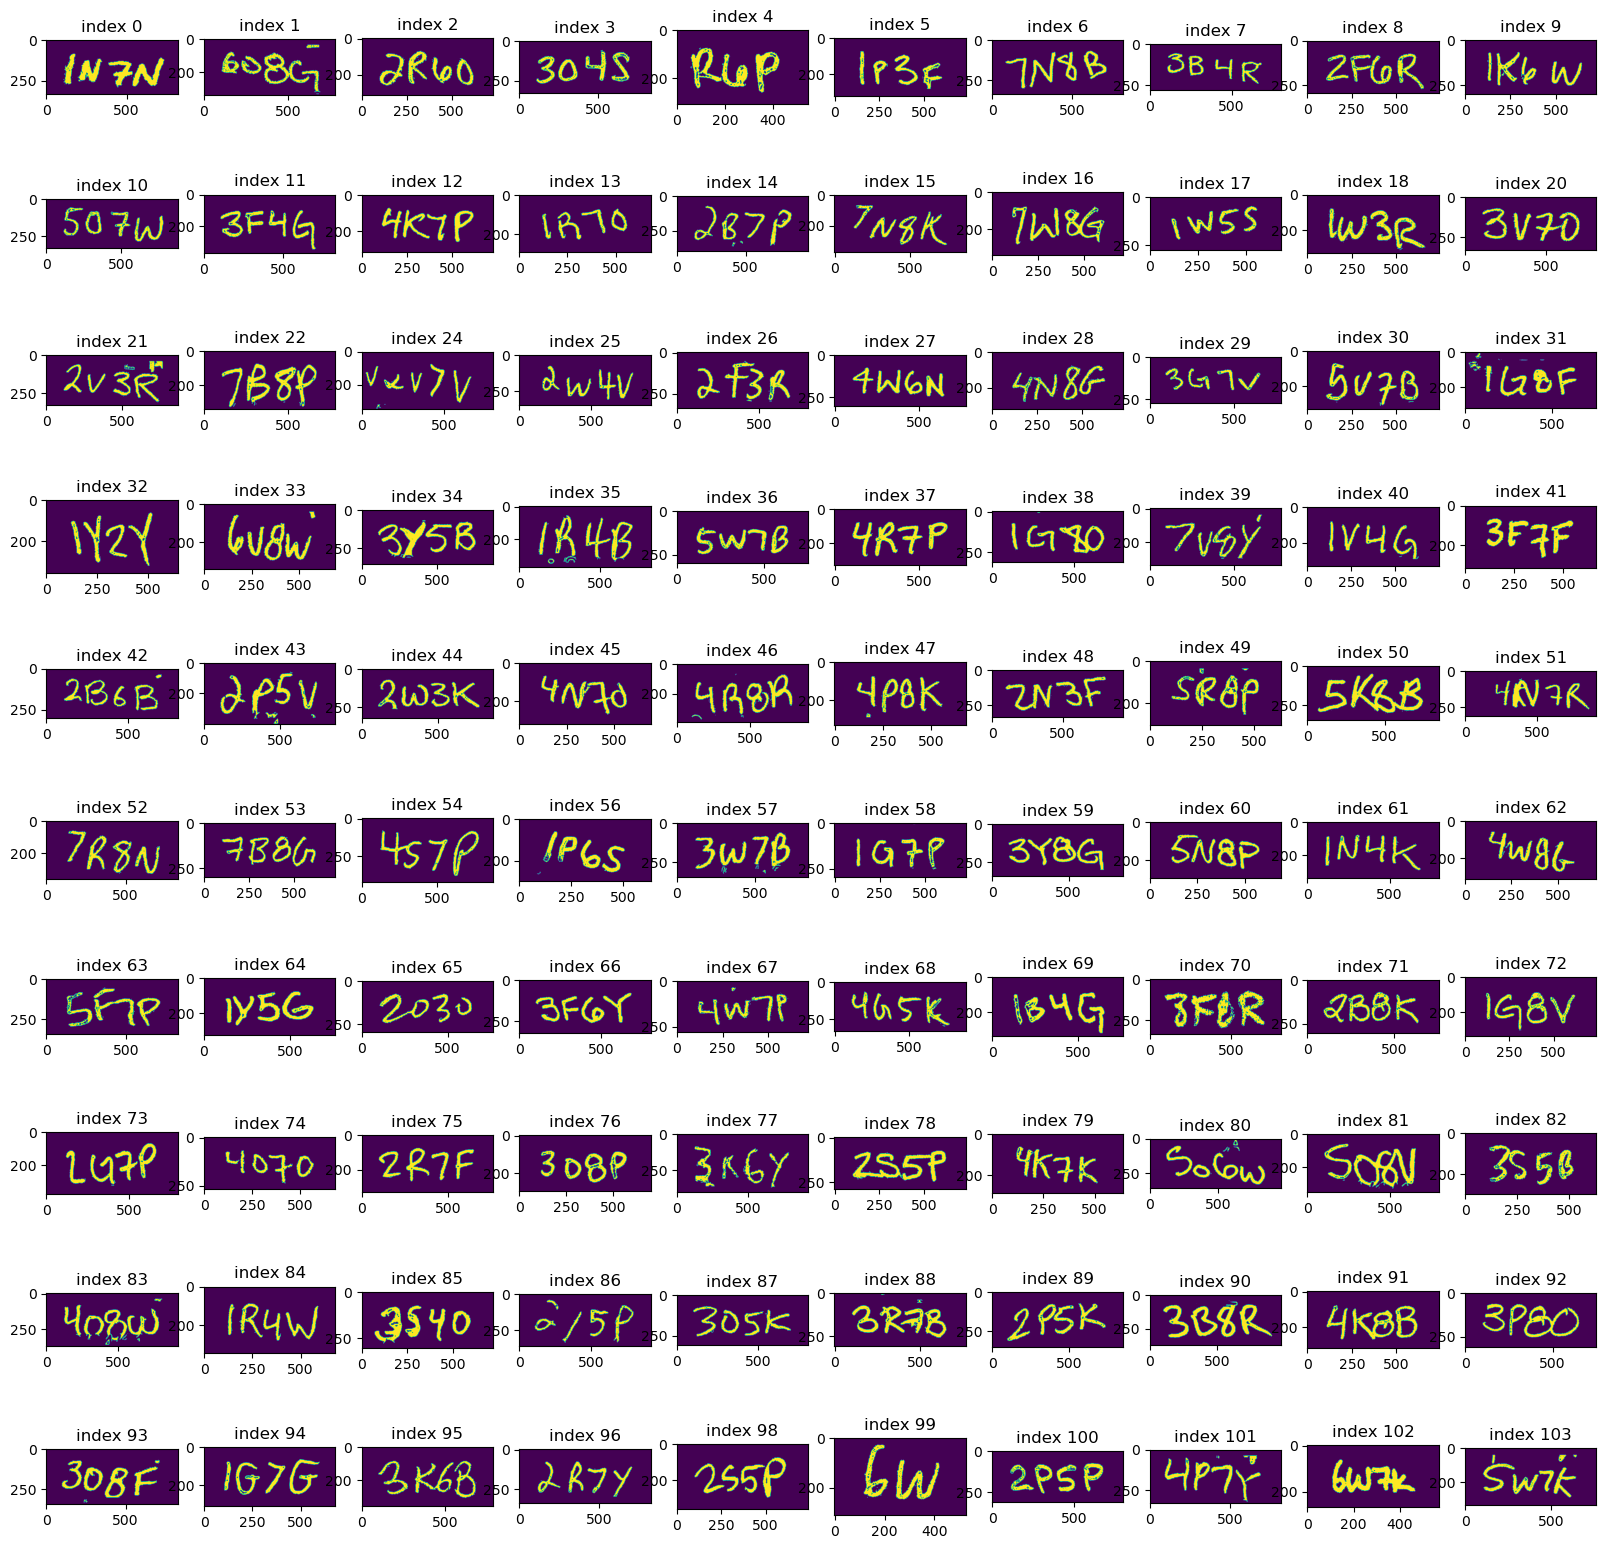

In [11]:
client = vision.ImageAnnotatorClient()
fig,ax = plt.subplots(10,10, figsize=(20,20))
padx = 100
pady = 80

i = 0
j = 0

while i < 100:
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[j])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes, added_length=100)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        if len(character_boxes) == 3:
            final_image = remove_deltas(masked_image, width=15, padx=padx + 80, pady=pady//2, verbose = False)

        else:
            final_image = remove_deltas(masked_image, width=15, padx=padx, pady=pady//2, verbose = False)

        shape = np.shape(final_image)
        counts = np.count_nonzero(final_image)
        valid_test = counts / (shape[0] * shape[1])

        if valid_test > 0.065 and shape[0] > 250 and shape[1] < 1000:
            ax[i // 10, i % 10].imshow(final_image)
            ax[i // 10, i % 10].set_title('index %i' %j)

            print(j, valid_test)

            i += 1
            j += 1

        else:
            j += 1
            
    except:
        j += 1
        pass